In [1]:
'''We are going to import all the things we might want to use in this script/future scripts to make sure we have them all.
If it says that package is not loaded/unavalible please run '%pip install PACKAGE_NAME' like feets if ran below. '''

%pip install feets
import feets
import os
import math
import numpy as np
import argparse
from astropy.table import Table, Column, join
import sys
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
import pickle
import matplotlib.pylab as pylab
from astropy.table import Table, Column, join
import glob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.4/83.4 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for feets: filename=feets-0.4-py3-none-any.whl size=141059 sha256=7e8717d0f7d9f03239f6c8a95274846e2b2e960e3401dcd59376420853b374a7
  Stored in directory: /root/.cache/pip/wheels/6a/18/76/926b679c82b11c49ff99a66ed24f4a06c88787332c351ca786
Successfully built feets


In [2]:
'''If you are working from goodle co-lab you will need to point the notebook towards the data. this is how,
you will have to press accepted and possibly sign in'''

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
''' Next we will get light curves, there are 3 folders to choose from this notebook is for LC_set1.
Note the path below will change if you are working from a local computer '''

## folder - LC_set1_files (columns: hjd, mag, emag)
## folder - LC_set2_files (columns: mjd, mag, emag, uplim)
path = '/content/drive/MyDrive/ISYA_ML/Data/LC_set1_files'


In [5]:
''' We are going to make a list with each light curve name, and look at it to see if there are any non ascii files. If there are we need to remember to
only load .ascii in a step below '''

file_list = os.listdir(path)
file_list

['exampledata_2.ascii',
 'exampledata_18.ascii',
 'exampledata_48.ascii',
 'exampledata_61.ascii',
 'exampledata_63.ascii',
 'exampledata_68.ascii',
 'exampledata_33.ascii',
 'exampledata_50.ascii',
 'exampledata_12.ascii',
 'exampledata_39.ascii',
 'exampledata_69.ascii',
 'exampledata_13.ascii',
 'exampledata_29.ascii',
 'exampledata_5.ascii',
 'exampledata_36.ascii',
 'exampledata_66.ascii',
 'exampledata_44.ascii',
 'exampledata_51.ascii',
 'exampledata_41.ascii',
 'exampledata_53.ascii',
 'exampledata_62.ascii',
 'exampledata_14.ascii',
 'exampledata_27.ascii',
 'exampledata_11.ascii',
 'exampledata_23.ascii',
 'exampledata_34.ascii',
 'exampledata_10.ascii',
 'exampledata_35.ascii',
 'exampledata_31.ascii',
 'exampledata_56.ascii',
 'exampledata_7.ascii',
 'exampledata_38.ascii',
 'exampledata_32.ascii',
 'exampledata_30.ascii',
 'exampledata_17.ascii',
 'exampledata_58.ascii',
 'exampledata_54.ascii',
 'exampledata_21.ascii',
 'exampledata_70.ascii',
 'exampledata_25.ascii',
 'e

exampledata_33.ascii


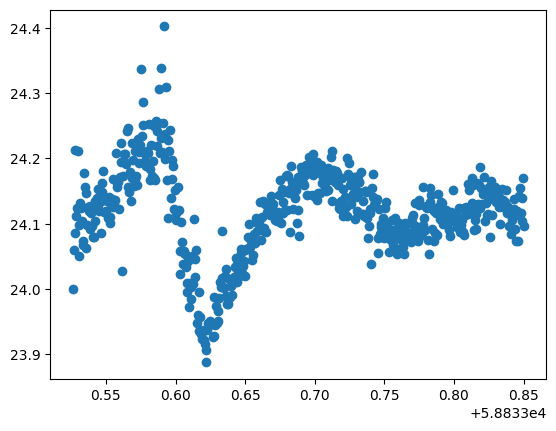

In [6]:
''' Now I'd like you to look at at least 10 light curves, you can do this by changing the num variable. Note python starts indexing at 0'''

num = 6
print(file_list[num])

hjd, mag, emag = np.loadtxt(path+'/'+file_list[num], unpack = True, skiprows=1)
plt.scatter(hjd, mag)


# What features do you think could describe the light curves for ML?

Papers to consider reading:

https://ui.adsabs.harvard.edu/abs/2021MNRAS.506.2089W/abstract
https://ui.adsabs.harvard.edu/abs/2011ApJ...735...68K/abstract
https://ui.adsabs.harvard.edu/abs/2016A%26A...587A..18K/abstract
https://ui.adsabs.harvard.edu/abs/2015arXiv150600010N/abstract
https://ui.adsabs.harvard.edu/abs/2013ApJ...777...83P/abstract

Types of features which have been used for light curves:

Autocor_length,
Beyond1Std,
CAR_sigma,
CAR_mean,
CAR_tau,
Con,
Eta_e,
LinearTrend,
MaxSlope,
Mean,
Meanvariance,
MedianAbsDev,
MedianBRP,
PairSlopeTrend,
PercentAmplitude,
Q31,
Rcs,
Skew,
SlottedA_length,
SmallKurtosis,
Std,
StetsonK_AC,
Amplitudes,
VariabilityIndex,
hl_ratio,
amp1_val,
amp_2_1_ratio,
amp_3_1_ratio,
phase_2_1_ratio,
phase_3_1_ratio,


In [10]:
''' This is the main part where we will use the feets package to get all of the futures listed above/below. First we create empty lists
which we will use to store the feature and light curve information, and then we will iterate through each file '''

used_lcs = []
filenames = []
LC_name = []
Autocor_length = []
Beyond1Std = []
CAR_sigma = []
CAR_mean = []
CAR_tau =[]
Con =[]
Eta_e = []
LinearTrend = []
MaxSlope =[]
Mean = []
Meanvariance = []
MedianAbsDev =[]
MedianBRP =[]
PairSlopeTrend =[]
PercentAmplitude =[]
Q31 =[]
Rcs =[]
Skew =[]
SlottedA_length =[]
SmallKurtosis =[]
Std = []
StetsonK_AC = []
Amplitudes = []
VariabilityIndex = []
hl_ratio = []
amp1_val = []
amp_2_1_ratio = []
amp_3_1_ratio = []
phase_2_1_ratio = []
phase_3_1_ratio = []

''' now we start to loop through each light curve, note we only grab the files that end with .ascii '''

for filename in file_list:
        if filename.endswith('.ascii'):
            try:
                hjd, mag, emag = np.loadtxt(path + filename, unpack = True, skiprows=1)
            except:
                print('FILE EMPTY)')
            sum_mag = np.sum(mag)

            '''We don't won't to work with light curves with no values so we
            should filter them out before we get the features'''

            if sum_mag == 0:
                lc_with_only_zeros.append(filename)
            elif sum_mag != 0:
                used_lcs.append(filename)
            clean_hjd = []
            clean_mag = []
            clean_emag = []

            '''Now we want to clean the light curves to remove any none numbers (someones nan's will be in the data)'''

            for l,m,n in zip(hjd,mag, emag):
                if m != 0:
                    if m != 0:
                        clean_hjd.append(l)
                        clean_mag.append(m)
                        clean_emag.append(n)
                    elif m != float:
                        pass

            '''The feets package needs at least 3 data points, so we need to ensure they have at least 3 points'''

            if len(clean_hjd) > 3:
                lc = np.array([clean_mag, clean_hjd, clean_emag])

                '''Below we run the feets package to grab the listed features '''


                fs=feets.FeatureSpace(only=['Autocor_length', 'Beyond1Std', 'CAR_sigma', 'CAR_mean',
                                            'CAR_tau', 'Con', 'LinearTrend', 'MaxSlope',
                                            'Mean', 'Meanvariance', 'MedianAbsDev', 'MedianBRP',
                                            'PairSlopeTrend', 'PercentAmplitude', 'Q31', 'Rcs', 'Skew',
                                            'SlottedA_length', 'SmallKurtosis', 'Std',
                                            'StetsonK_AC' ])

                ''' Now we append the values to the list we made earlier. This happens for all ligthcurves which pass our ceritia '''

                features, values = fs.extract(*lc)
                #print(features, values)
                results = dict(zip(features,values))
                #print(results['Autocor_length'])
                filenames.append(filename)
                Autocor_length.append(results['Autocor_length'])
                Beyond1Std.append(results['Beyond1Std'])
                CAR_sigma.append(results['CAR_sigma'])
                CAR_mean.append(results['CAR_mean'])
                CAR_tau.append(results['CAR_tau'])
                Con.append(results['Con'])
                LinearTrend.append(results['LinearTrend'])
                MaxSlope.append(results['MaxSlope'])
                Mean.append(results['Mean'])
                Meanvariance.append(results['Meanvariance'])
                MedianAbsDev.append(results['MedianAbsDev'])
                MedianBRP.append(results['MedianBRP'])
                PairSlopeTrend.append(results['PairSlopeTrend'])
                PercentAmplitude.append(results['PercentAmplitude'])
                Q31.append(results['Q31'])
                Rcs.append(results['Rcs'])
                Skew.append(results['Skew'])
                SlottedA_length.append(results['SlottedA_length'])
                SmallKurtosis.append(results['SmallKurtosis'])
                Std.append(results['Std'])
                StetsonK_AC.append(results['StetsonK_AC'])


            else:
                print('Not enough data points')

FILE EMPTY)


/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])


FILE EMPTY)


/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])


FILE EMPTY)
FILE EMPTY)


/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])


FILE EMPTY)


/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])


FILE EMPTY)


/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])


FILE EMPTY)


/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])


FILE EMPTY)
FILE EMPTY)


/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])


FILE EMPTY)


/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])


FILE EMPTY)


/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])


FILE EMPTY)
FILE EMPTY)


/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])


FILE EMPTY)
FILE EMPTY)


/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])


FILE EMPTY)


/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])


FILE EMPTY)


/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])


FILE EMPTY)


/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])


FILE EMPTY)


/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])


FILE EMPTY)


/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])


FILE EMPTY)


/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])


FILE EMPTY)
FILE EMPTY)


/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])


FILE EMPTY)


/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])


FILE EMPTY)


/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])


FILE EMPTY)


/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])


FILE EMPTY)
FILE EMPTY)


/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])


FILE EMPTY)
FILE EMPTY)


/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])


FILE EMPTY)


/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])


FILE EMPTY)
FILE EMPTY)


/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])


FILE EMPTY)


/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])


FILE EMPTY)


/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])


FILE EMPTY)


/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])


FILE EMPTY)


/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])


FILE EMPTY)
FILE EMPTY)


/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])


FILE EMPTY)


/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])


FILE EMPTY)


/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])


FILE EMPTY)
FILE EMPTY)


/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])


FILE EMPTY)
FILE EMPTY)


/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])


FILE EMPTY)


/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])


FILE EMPTY)


/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])


FILE EMPTY)


/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])


FILE EMPTY)
FILE EMPTY)


/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])


FILE EMPTY)
FILE EMPTY)


/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])


FILE EMPTY)


/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])


FILE EMPTY)


/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])


FILE EMPTY)


/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])


FILE EMPTY)
FILE EMPTY)


/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])


FILE EMPTY)


/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])


FILE EMPTY)
FILE EMPTY)


/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])


FILE EMPTY)


/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])


FILE EMPTY)
FILE EMPTY)


/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])


FILE EMPTY)


/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])


FILE EMPTY)


/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])


FILE EMPTY)
FILE EMPTY)


/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])


FILE EMPTY)
FILE EMPTY)


/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])


FILE EMPTY)


/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])


FILE EMPTY)


/usr/local/lib/python3.10/dist-packages/feets/extractors/ext_max_slope.py:91: RuntimeWarning: divide by zero encountered in true_divide
  slope = np.abs(magnitude[1:] - magnitude[:-1]) / (time[1:] - time[:-1])


In [11]:

'''Now we ease we'll store evertthing into a table with each row representing a different light curve'''


feature_table = Table()
feature_table['LC_name'] = filenames
feature_table['Autocor_length'] = Autocor_length
feature_table['Beyond1Std'] = Beyond1Std
feature_table['CAR_sigma'] = CAR_sigma
feature_table['CAR_mean'] = CAR_mean
feature_table['CAR_tau'] = CAR_tau
feature_table['Con'] = Con
feature_table['LinearTrend'] = LinearTrend
feature_table['MaxSlope'] = MaxSlope
feature_table['Mean'] =Mean
feature_table['Meanvariance'] =Meanvariance
feature_table['MedianAbsDev'] =MedianAbsDev
feature_table['MedianBRP'] =MedianBRP
feature_table['PairSlopeTrend'] =PairSlopeTrend
feature_table['PercentAmplitude'] =PercentAmplitude
feature_table['Q31'] =Q31
feature_table['Rcs'] =Rcs
feature_table['Skew'] =Skew
feature_table['SlottedA_length'] =SlottedA_length
feature_table['SmallKurtosis'] =SmallKurtosis
feature_table['Std'] =Std
feature_table['StetsonK_AC'] =StetsonK_AC

''' And save the table for later use. If you are using the shared googled account, please add your name before feature_set.cvs eg. sara_feature_set.csv'''
output =path+'/sara_features_set.csv'
df = feature_table.to_pandas()
df = df.replace(np.nan, 0)
df.to_csv(output)


# Now think of some other features you can add in

# Evlauting what features are meaninful

In [12]:
feature_set_path = path+'/sara_features_set.csv'

df = pd.read_csv(feature_set_path, delimiter=',')
df.replace([np.inf, -np.inf], 0)
df = df.replace(np.nan, 0)
print(df)
# Seperate into clean lists and replace nan's with zeros

LC_name = []
Autocor_length = []
Beyond1Std = []
CAR_sigma = []
CAR_mean= []
CAR_tau= []
Con= []
LinearTrend= []
MaxSlope= []
Mean= []
Meanvariance= []
MedianAbsDev= []
MedianBRP= []
PairSlopeTrend= []
PercentAmplitude= []
Q31= []
Rcs= []
Skew= []
SlottedA_length= []
SmallKurtosis= []
Std= []
StetsonK_AC= []

for index, row in df.iterrows():
    LC_name.append(row.LC_name)
    Autocor_length.append(row.Autocor_length)
    Beyond1Std.append(row.Beyond1Std)
    CAR_sigma.append(row.CAR_sigma)
    CAR_mean.append(row.CAR_mean)
    CAR_tau.append(row.CAR_tau)
    Con.append(row.Con)
    LinearTrend.append(row.LinearTrend)
    MaxSlope.append(row.MaxSlope)
    Mean.append(row.Mean)
    Meanvariance.append(row.Meanvariance)
    MedianAbsDev.append(row.MedianAbsDev)
    MedianBRP.append(row.MedianBRP)
    PairSlopeTrend.append(row.PairSlopeTrend)
    PercentAmplitude.append(row.PercentAmplitude)
    Q31.append(row.Q31)
    Rcs.append(row.Rcs)
    Skew.append(row.Skew)
    SlottedA_length.append(row.SlottedA_length)
    SmallKurtosis.append(row.SmallKurtosis)
    Std.append(row.Std)
    StetsonK_AC.append(row.StetsonK_AC)

df = df.replace(np.nan, 0)
print(df)

    Unnamed: 0               LC_name  Autocor_length  Beyond1Std  CAR_sigma  \
0            0   exampledata_2.ascii           125.0    0.412281       10.0   
1            1  exampledata_18.ascii           125.0    0.412281       10.0   
2            2  exampledata_48.ascii           125.0    0.412281       10.0   
3            3  exampledata_61.ascii           125.0    0.412281       10.0   
4            4  exampledata_63.ascii           125.0    0.412281       10.0   
..         ...                   ...             ...         ...        ...   
66          66  exampledata_42.ascii           125.0    0.412281       10.0   
67          67   exampledata_6.ascii           125.0    0.412281       10.0   
68          68  exampledata_65.ascii           125.0    0.412281       10.0   
69          69  exampledata_22.ascii           125.0    0.412281       10.0   
70          70     TSNE_values.ascii           125.0    0.412281       10.0   

         CAR_mean  CAR_tau  Con  LinearTrend  MaxSl

In [13]:
# create dictionary for all the wanted features (change up for different requirements,
# you dont' have to use all the features :)
dict = {'Filename': LC_name, 'Autocor_length': Autocor_length,
        'Beyond1Std' : Beyond1Std, 'CAR_sigma': CAR_sigma,
        'CAR_mean': CAR_mean, 'CAR_tau':CAR_tau, 'Con':Con,
        'LinearTrend': LinearTrend,
        'MaxSlope':MaxSlope, 'Mean' : Mean,
        'Meanvariance': Meanvariance, 'MedianAbsDev': MedianAbsDev,
        'MedianBRP' : MedianBRP, 'PairSlopeTrend' : PairSlopeTrend,
        'PercentAmplitude' : PercentAmplitude, 'Q31':Q31, 'Rcs':Rcs,
        'Skew':Skew, 'SlottedA_length' :SlottedA_length,
        'SmallKurtosis':SmallKurtosis, 'Std':Std,
        'StetsonK_AC':StetsonK_AC}


In [14]:
#Put dictionary into a pandas datadframe with no NaNs or Infs  #
dframe = pd.DataFrame(dict)
dframe.replace('inf', 0)
dframe = dframe.replace(np.nan, 0)
print(len(dframe))
print(dframe)

71
                Filename  Autocor_length  Beyond1Std  CAR_sigma  \
0    exampledata_2.ascii           125.0    0.412281       10.0   
1   exampledata_18.ascii           125.0    0.412281       10.0   
2   exampledata_48.ascii           125.0    0.412281       10.0   
3   exampledata_61.ascii           125.0    0.412281       10.0   
4   exampledata_63.ascii           125.0    0.412281       10.0   
..                   ...             ...         ...        ...   
66  exampledata_42.ascii           125.0    0.412281       10.0   
67   exampledata_6.ascii           125.0    0.412281       10.0   
68  exampledata_65.ascii           125.0    0.412281       10.0   
69  exampledata_22.ascii           125.0    0.412281       10.0   
70     TSNE_values.ascii           125.0    0.412281       10.0   

         CAR_mean  CAR_tau  Con  LinearTrend  MaxSlope          Mean  ...  \
0   117667.376483      0.5  0.0    -0.023589       inf  58833.688241  ...   
1   117667.376483      0.5  0.0    -0.

In [15]:

#Define what features to use in the clustering, don't cluster on the targert/ID names! #
features = ['Autocor_length', 'Beyond1Std', 'CAR_sigma', 'CAR_mean',
            'CAR_tau', 'Con', 'LinearTrend',
            'Mean', 'Meanvariance', 'MedianAbsDev', 'MedianBRP',
            'PairSlopeTrend', 'Q31', 'Rcs', 'Skew', 'SlottedA_length',
            'SmallKurtosis', 'Std', 'StetsonK_AC']

## Separating out the features:
x = dframe.loc[:, features].values
## Separating out the LC names:
y = dframe.loc[:,['Filename']].values
# Standardise the features
x = StandardScaler().fit_transform(x)

In [16]:
## Simple 2D component breakdown for PCA. Don't need to do this but can be helpful to see ##
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns =['PC1', 'PC2'])
finalDf = pd.concat([principalDf, dframe[['Filename']]], axis =1)

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_pca.py:545: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var


<ipython-input-17-d61089fbad09>:6: RuntimeWarning: divide by zero encountered in double_scalars
  scalex = 1.0/(xs.max() - xs.min())
<ipython-input-17-d61089fbad09>:7: RuntimeWarning: divide by zero encountered in double_scalars
  scaley = 1.0/(ys.max() - ys.min())
<ipython-input-17-d61089fbad09>:8: RuntimeWarning: invalid value encountered in multiply
  plt.scatter(xs*scalex, ys*scaley, c ='b' , alpha =0.3, s =2)


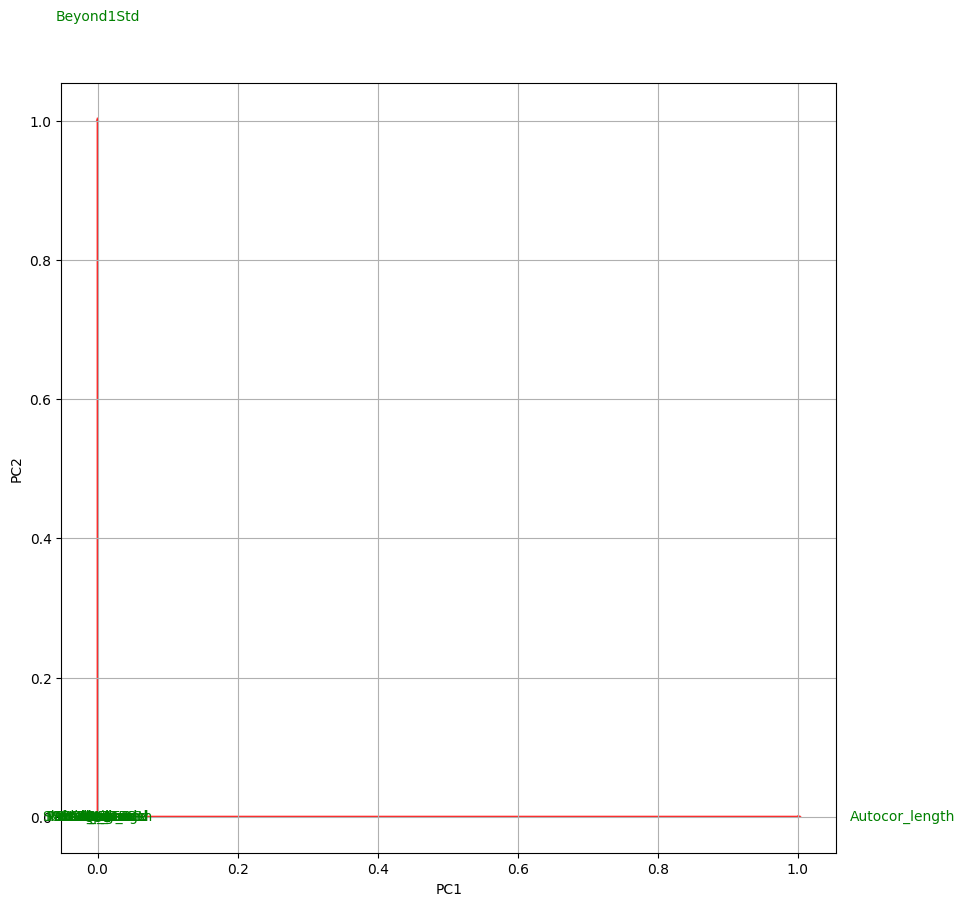

['Autocor_length', 'Beyond1Std', 'CAR_sigma', 'CAR_mean', 'CAR_tau', 'Con', 'LinearTrend', 'Mean', 'Meanvariance', 'MedianAbsDev', 'MedianBRP', 'PairSlopeTrend', 'Q31', 'Rcs', 'Skew', 'SlottedA_length', 'SmallKurtosis', 'Std', 'StetsonK_AC']


In [17]:
def myplot(score, coeff, labels=None):
        # this plot will help us visualise which features have the highest coeffiants in PC1 and PC2
        xs = score[:,0]
        ys = score[:,1]
        n = coeff.shape[0]
        scalex = 1.0/(xs.max() - xs.min())
        scaley = 1.0/(ys.max() - ys.min())
        plt.scatter(xs*scalex, ys*scaley, c ='b' , alpha =0.3, s =2)
        for i in range(n):
                plt.arrow(0,0, coeff[i,0], coeff[i,1], color = 'r', alpha =0.7)
                if labels is None:
                        plt.text(coeff[i,0]*1.15, coeff[i,1] *1.15, "Var"+str(i+1), color="hotpink", ha = 'center', va = 'center')
                else:
                        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
fig = plt.figure(figsize=(10,10))
#plt.xlim(-0.1,0.1)
#plt.ylim(-0.1, 0.1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()
myplot(principalComponents[:,0:2],np.transpose(pca.components_[0:2, :]), labels=features)
plt.show()
print(features)

In [18]:
## we can see that two features are really powerfull. Now remake the plot to zoom into the other features to see what they look like

In [ ]:
## If you are adventurous you can try make a correlation matrix of the results like this person did https://hackernoon.com/creating-visualizations-to-better-understand-your-data-and-models-part-1-a51e7e5af9c0